In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Luchiana\OneDrive - ONE NEW EXPERIENCE\Desktop\Others-private\Python-Projects\Crime_Dataset_Cleaned.csv")
df.head()

,ID,Reported Date,Occured Date,Occured Time,Area Name,Crime Code,Crime Code Desc,Victim Age,Victim Sex,Race,Crime Loc Code,Crime Loc Code Desc,Weapon Code,Weapon Desc,Status,Status Desc,Location,Latitude,Longitude
0,10304468,2020-01-08,2020-01-08,22:30,Southwest,624,Battery - Simple Assault,36,Female,Black,501,Single Family Dwelling,400,"Strong-Arm (Hands, Fist, Feet Or Bodily Force)",AO,Adult Other,1100 W 39Th Pl,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,03:30,Central,624,Battery - Simple Assault,25,Male,Hispanic,102,Sidewalk,500,Unknown Weapon/Other Weapon,IC,Invest Cont,700 S Hill St,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,12:00,Central,845,Sex Offender Registrant Out Of Compliance,0,Unknown,Unknown,726,Police Facility,0,Weapon Desc,AA,Adult Arrest,200 E 6Th St,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,17:30,N Hollywood,745,Vandalism - Misdeameanor ($399 Or Under),76,Female,Unknown,502,"Multi-Unit Dwelling (Apartment, Duplex, Etc)",0,Weapon Desc,IC,Invest Cont,5400 Corteen Pl,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,04:15,Mission,740,"Vandalism - Felony ($400 & Over, All Church Va...",31,Unknown,Unknown,409,Beauty Supply Store,0,Weapon Desc,IC,Invest Cont,14400 Titus St,34.2198,-118.4468


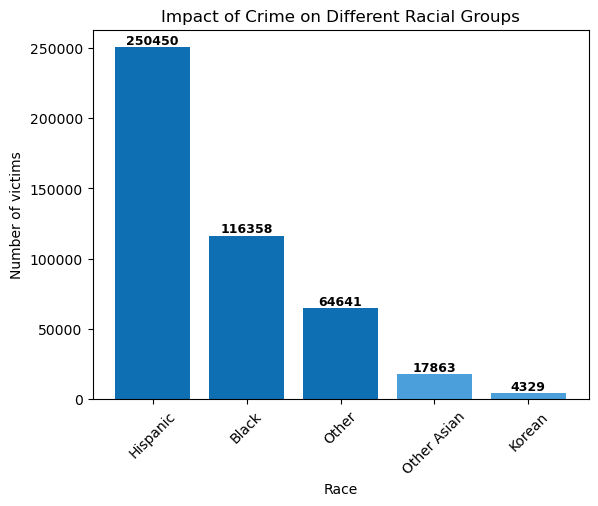

The race most impacted by the number of crimes is Hispanic followed by Black. Unfortunately, a number of 64641 victims are from other race.


In [96]:
#Most affected race by number of crimes from 2020 till 9th October 2023

df_victim_by_race = df.groupby('Race')['ID'].count().reset_index()
df_victim_by_race.columns=['Race','Total_victims']
df_victim_by_race = df_victim_by_race.sort_values(by='Total_victims', ascending=False).iloc[1:6]

df_victim_by_race['color'] = df_victim_by_race['Total_victims'].apply(lambda x:'#4B9FDA' if x < 50000 else '#0E6FB2')

max_crimes_no = df_victim_by_race['Total_victims'].idxmax()
second_max_crimes_no = df_victim_by_race.sort_values(by='Total_victims',ascending=False).iloc[1].name
third_crimes_no = df_victim_by_race.sort_values(by='Total_victims', ascending = False).iloc[2].name

veals = pd.Series(df_victim_by_race['Total_victims'].values)

plt.bar(df_victim_by_race['Race'], df_victim_by_race['Total_victims'], color=df_victim_by_race['color'])
plt.xlabel('Race')
plt.ylabel('Number of victims')
plt.title('Impact of Crime on Different Racial Groups')
plt.xticks(rotation=45)

for index,value in enumerate(veals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9, fontweight='semibold', color='#000')

plt.show()
    
message = 'The race most impacted by the number of crimes is \033[1m{}\033[0m followed by \033[1m{}\033[0m' \
          '. Unfortunately, a number of \033[1m{}\033[0m victims are from other race.'.format(
              df_victim_by_race['Race'].loc[max_crimes_no],
              df_victim_by_race['Race'].loc[second_max_crimes_no],
              df_victim_by_race['Total_victims'].loc[third_crimes_no])
print(message)


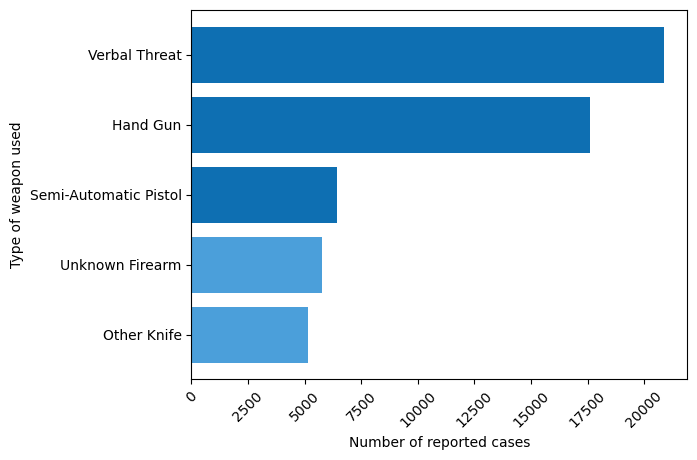

In [97]:
df_most_used_weapons = df.groupby(['Weapon Code','Weapon Desc'])['ID'].count().reset_index()
df_most_used_weapons.columns=['Weapon Code', 'Weapon', 'Number of crimes']
df_most_used_weapons = df_most_used_weapons[~df_most_used_weapons['Weapon Code'].astype(str).str.endswith('0')]
df_most_used_weapons = df_most_used_weapons.sort_values(by='Number of crimes', ascending =False).head(5)
df_top5_most_used_weapons = df_most_used_weapons.sort_values(by='Number of crimes', ascending= True)

df_top5_most_used_weapons['color'] =df_top5_most_used_weapons['Number of crimes'].apply(lambda x:'#4B9FDA' if x < 6000 else '#0E6FB2')


plt.barh(df_top5_most_used_weapons['Weapon'], df_top5_most_used_weapons['Number of crimes'], color = df_top5_most_used_weapons['color'])
plt.xlabel('Number of reported cases')
plt.ylabel('Type of weapon used')

#sns.barplot(x='Weapon',y='Number of crimes', data=df_most_used_weapons)
plt.xticks(rotation=45)
plt.show()

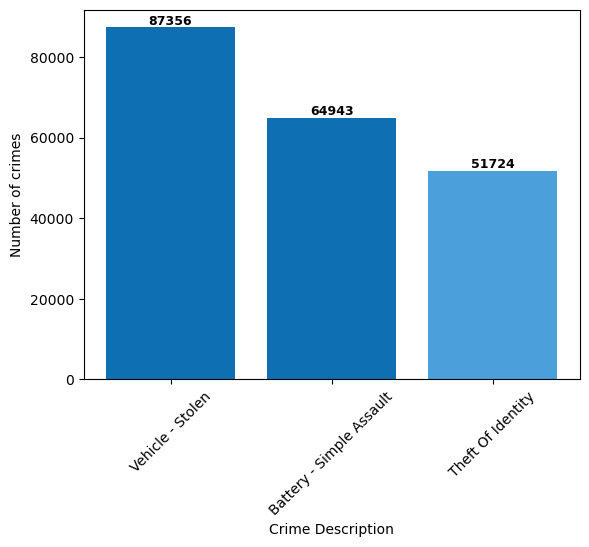

In [94]:
#most common type of crime
df.columns.tolist()

df_crimes = df.groupby(['Crime Code','Crime Code Desc'])['ID'].count().reset_index()
df_crimes.columns = ['Crime Code','Crime Description', 'Total Crimes']
df_crimes_top_3 = df_crimes.sort_values(by='Total Crimes', ascending=False).head(3)
df_crimes_top_3

vals = pd.Series(df_crimes_top_3['Total Crimes'].values)
df_crimes_top_3['color']=df_crimes_top_3['Total Crimes'].apply(lambda x:'#4B9FDA' if x<55000 else '#0E6FB2')

plt.bar(df_crimes_top_3['Crime Description'], df_crimes_top_3['Total Crimes'], color=df_crimes_top_3['color'])
plt.xlabel('Crime Description')
plt.ylabel('Number of crimes')
plt.xticks(rotation = 45)

for index,value in enumerate(vals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9, fontweight='semibold', color='#000')


plt.show()

#---de vazut cum sa scurtez descrierile !!

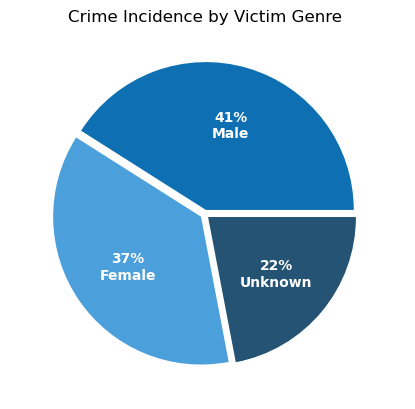

In [92]:
#pie chart by genre
#df_crimes_by_genre = 

#df.head(3)
total_crimes=df['ID'].count()

df_crimes_by_genre = df.groupby('Victim Sex')['ID'].count().reset_index()
df_crimes_by_genre.columns= ['Genre', 'Number of crimes']
df_crimes_by_genre = df_crimes_by_genre.sort_values(by='Number of crimes', ascending=False)

male_percentage = ((df_crimes_by_genre[df_crimes_by_genre['Genre']=='Male']['Number of crimes']
                    / total_crimes) * 100).round(0).astype(float)
female_percentage = ((df_crimes_by_genre[df_crimes_by_genre['Genre'] == 'Female']['Number of crimes'] 
                      / total_crimes ) * 100).round(0).astype(float)
unknown_percentage = ((df_crimes_by_genre[df_crimes_by_genre['Genre']=='Unknown']['Number of crimes']
                       / total_crimes) * 100).round(0).astype(float)

colors = ['#0E6FB2', '#4B9FDA','#245373']
slices = np.array([male_percentage.values[0],female_percentage.values[0], unknown_percentage.values[0]])
genres=['Male', 'Female', 'Unknown']
explode = (0.03,0.03,0.03)
slices, colors, autotexts= plt.pie(slices, labels=genres,autopct='%1.0f%%',colors=colors ,explode=explode, pctdistance=0.6, textprops={'color':'white','weight':'bold', 'fontsize':10})

for i, label in enumerate(genres):
    autotexts[i].set_text(f'{autotexts[i].get_text()}\n{label}')

plt.title("Crime Incidence by Victim Genre")
plt.show()



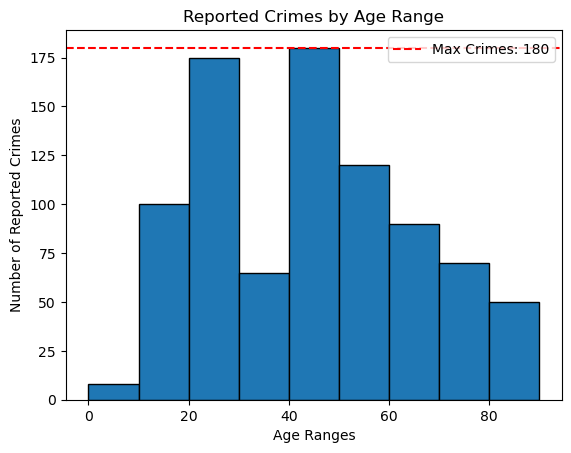

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
ages = [5,7,15, 25,20,34,32,45, 55, 65, 75, 85, 95, 105]
crime_counts = [3,5,100, 70, 105,50,15, 180, 120, 90, 70, 50, 30, 10]

# Create histogram chart
plt.hist(ages, bins=np.arange(0, 100, 10), weights=crime_counts, edgecolor='black')
plt.xlabel('Age Ranges')
plt.ylabel('Number of Reported Crimes')
plt.title('Reported Crimes by Age Range')
plt.grid(axis='y', linestyle='--',alpha=0.0, color='#E9E9E9')

# Add a horizontal line for the maximum value
max_crimes = max(crime_counts)
plt.axhline(y=max_crimes, color='red', linestyle='--', label=f'Max Crimes: {max_crimes}')
plt.legend()

plt.show()


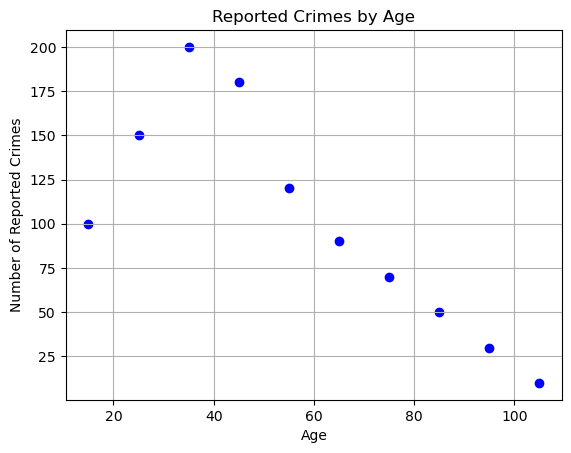

In [64]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
ages = [15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
crime_counts = [100, 150, 200, 180, 120, 90, 70, 50, 30, 10]

# Create scatter plot
plt.scatter(ages, crime_counts, color='blue', marker='o')
plt.xlabel('Age')
plt.ylabel('Number of Reported Crimes')
plt.title('Reported Crimes by Age')
plt.grid(True)
plt.show()